<a href="https://colab.research.google.com/github/Bacheese/Maple/blob/master/SA_YOLOv5_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Roboflow and Yolov5 Collaboration***


1.   Training the Model
2.   Testing the Model
3.   Results



In [ ]:
#clone forked YOLOv5 from Ultralytics YOLOv5 Repository
!git clone https://github.com/roginalddc22/yolov5  # clone repo
%cd yolov5  
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow # install roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

In [ ]:
import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

In [ ]:
from roboflow import Roboflow #import roboflow for our datasets
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

In [ ]:
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="IxKM1DmvLdi2MBBUKWbh")
project = rf.workspace("mapua-university-ks8g3").project("fa2-cctv-motorcycle-drivers-with-h-or-not")
dataset = project.version(2).download("yolov5")

**Training the Model**
In this section, we will train the model using the train.py from the ultralytics repository. The model paremeters were already tuned to yield the best performing model version. The following hyperparameters were optimal for the model:

Image size = 416 pixels

Batch size = 16

Epochs = 50

YOLOv5 Version = YOLOv5s (Small)


After the training process, the metrics of the model such as the precision, recall, and mAP score of the model is displayed using tensorboard.

We would also be doing the same dataset for the other two scales specifically for YOLOv5m and YOLOv5l

Same protocol for the results that we will be getting

## Categorizing Files and Yaml Implementation

In [ ]:
import os
import glob
import shutil

parts = ["1st-video-cut", "2nd-video-cut", "3rd-video-cut"]
folders = ["test", "train", "valid"]
subpart = ["images", "labels"]

for x in parts: 
  for y in folders:
    for z in subpart:
      source = "/content/datasets/FA2-CCTV-Motorcycle-Drivers/{}/{}".format(y,z)
      destination = "/content/MotorcycleDrivers/{}/{}/{}".format(x,y,z)
      allfiles = glob.glob(os.path.join(source, '{}*'.format(x)), recursive=True)
      print("Files to move", allfiles)
      
      if not os.path.exists(destination):
          os.makedirs(destination)
      for file_path in allfiles:
          dst_path = os.path.join(destination, os.path.basename(file_path))
          shutil.move(file_path, dst_path)
          print(f"Moved {file_path} -> {dst_path}")

In [ ]:
#yaml files for each part
parts = ["1st-video-cut", "2nd-video-cut", "3rd-video-cut"]
for x in parts:
  source = "/content/datasets/FA2-CCTV-Motorcycle-Drivers/data.yaml"
  destination = "/content/MotorcycleDrivers/{}".format(x)
  shutil.copy2(source, destination)

# **YOLOv5 Small Scale for the First Video Cut**

In [ ]:
!python train.py --img 416 --batch 16 --epochs 50 --data /content/MotorcycleDrivers/1st-video-cut/data.yaml --weights yolov5s.pt --cache

## **TensorBoard**
In this section, we will discuss the metrics of the model shown in tensorboard. Firstly, we will see the scalar metrics of the model such as mAP (mean average precision), precision, and recall. This metrics will determine if trained model is overfitting or underfitting. Next is the images, here we will be able to see the graphs of the performance of the model such as F1 curve, P curve, Confusion matrix, and the overall results of the model. Lastly, in the time series tab, all the graphs are shown from all the runtimes of the model training.

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
#detecting and predicting using the test dataset
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source /content/MotorcycleDrivers/1st-video-cut/test/images


In [ ]:
#display inference on ALL test images
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# **RESULTS FOR FIRST CUT VIDEO (SMALL SCALE)**



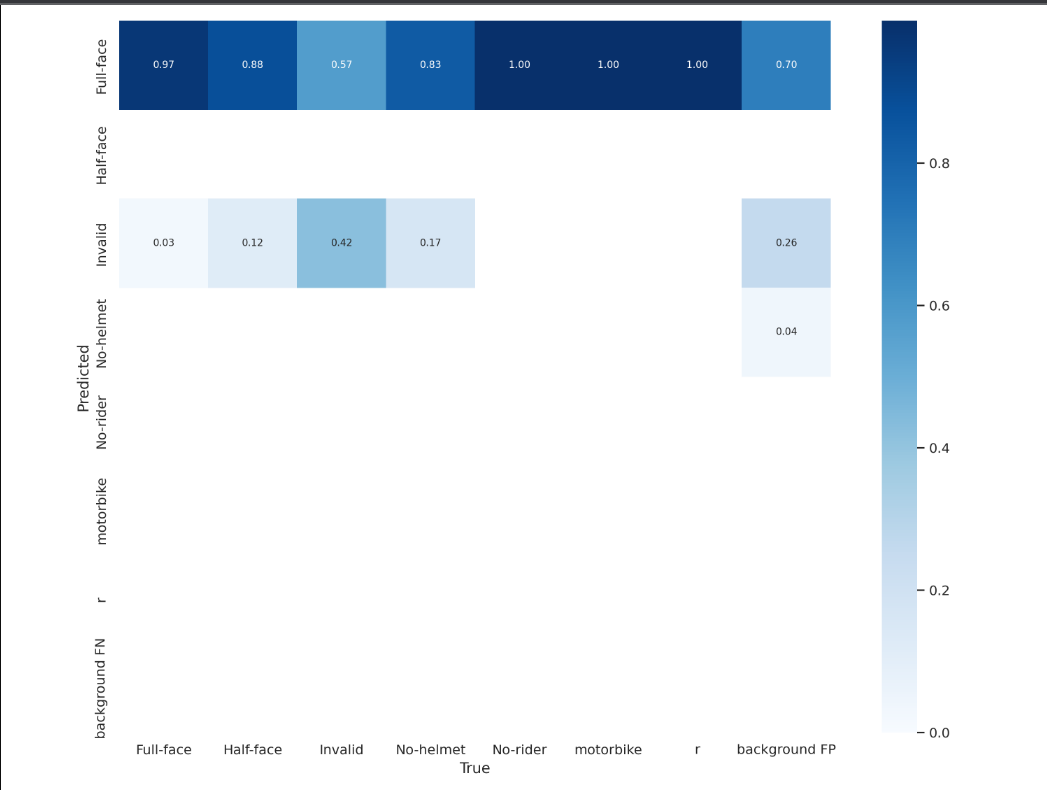

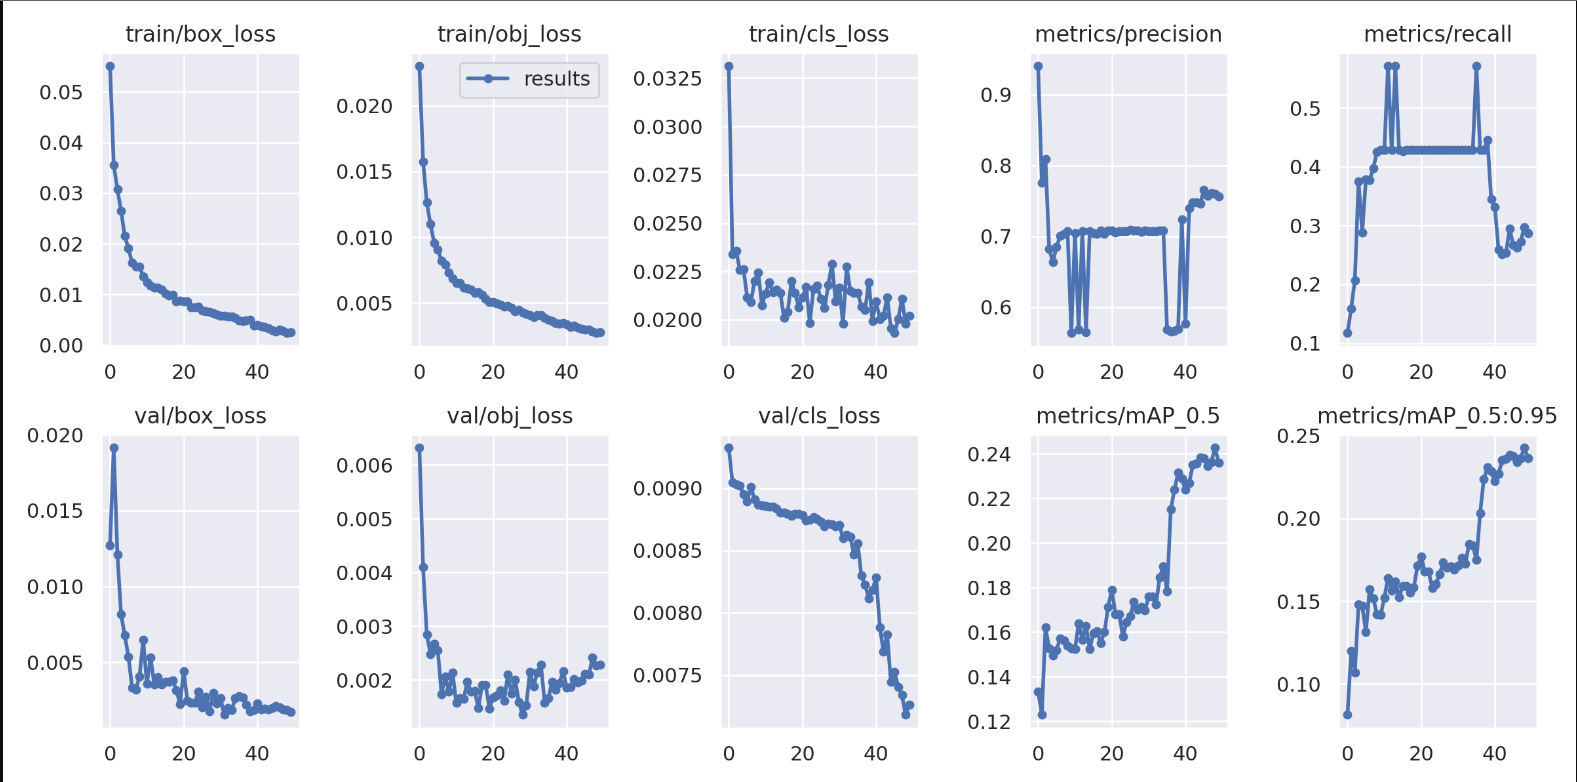

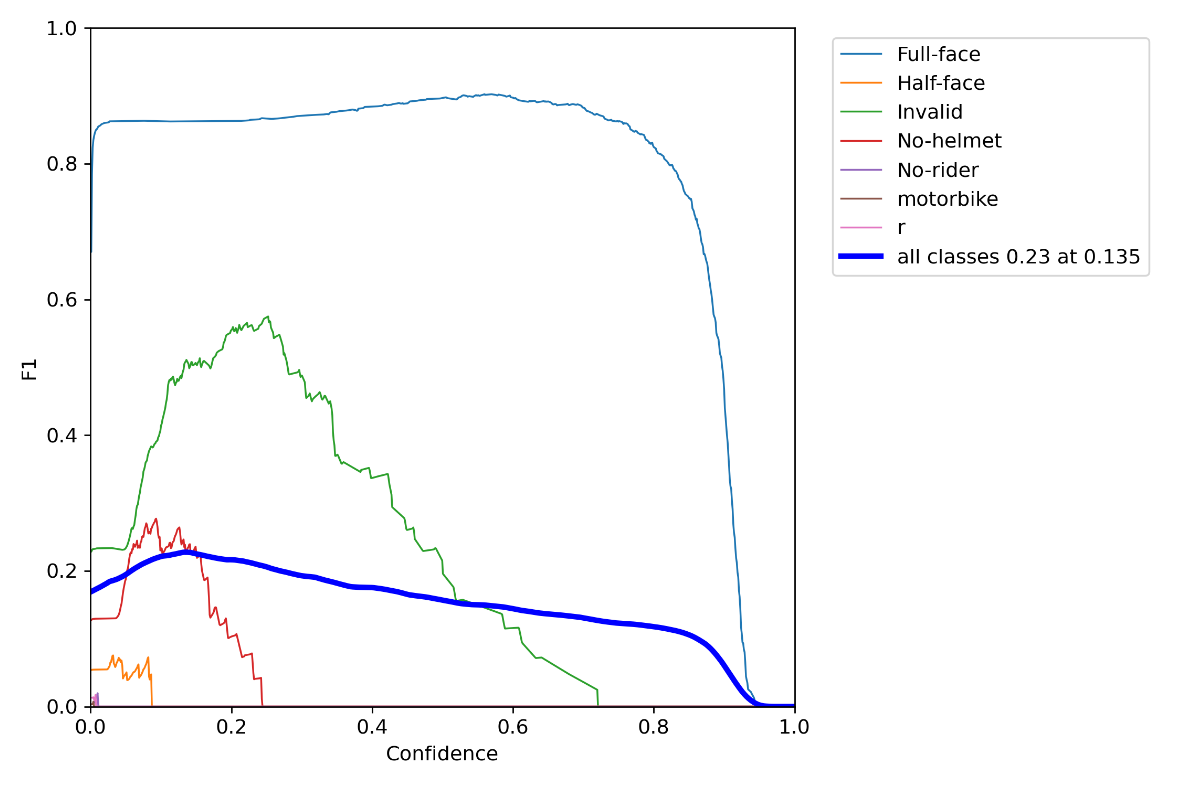

# **1st-video-cut MEDIUM Scale**

In [ ]:
!python train.py --img 416 --batch 16 --epochs 50 --data /content/MotorcycleDrivers/1st-video-cut/data.yaml --weights yolov5m.pt --cache


In [ ]:
!zip -r /content/MotorcycleDrivers.zip /content/MotorcycleDrivers

## **TensorBoard**
In this section, we will discuss the metrics of the model shown in tensorboard. Firstly, we will see the scalar metrics of the model such as mAP (mean average precision), precision, and recall. This metrics will determine if trained model is overfitting or underfitting. Next is the images, here we will be able to see the graphs of the performance of the model such as F1 curve, P curve, Confusion matrix, and the overall results of the model. Lastly, in the time series tab, all the graphs are shown from all the runtimes of the model training.


In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs 

In [ ]:
#detecting and predicting using the test dataset
!python detect.py --weights runs/train/exp3/weights/best.pt --img 416 --conf 0.1 --source /content/MotorcycleDrivers/1st-video-cut/test/images

In [ ]:
#display inference on ALL test images
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp3/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")


# RESULTS OF FIRST CUT VIDEO (Medium Scale)

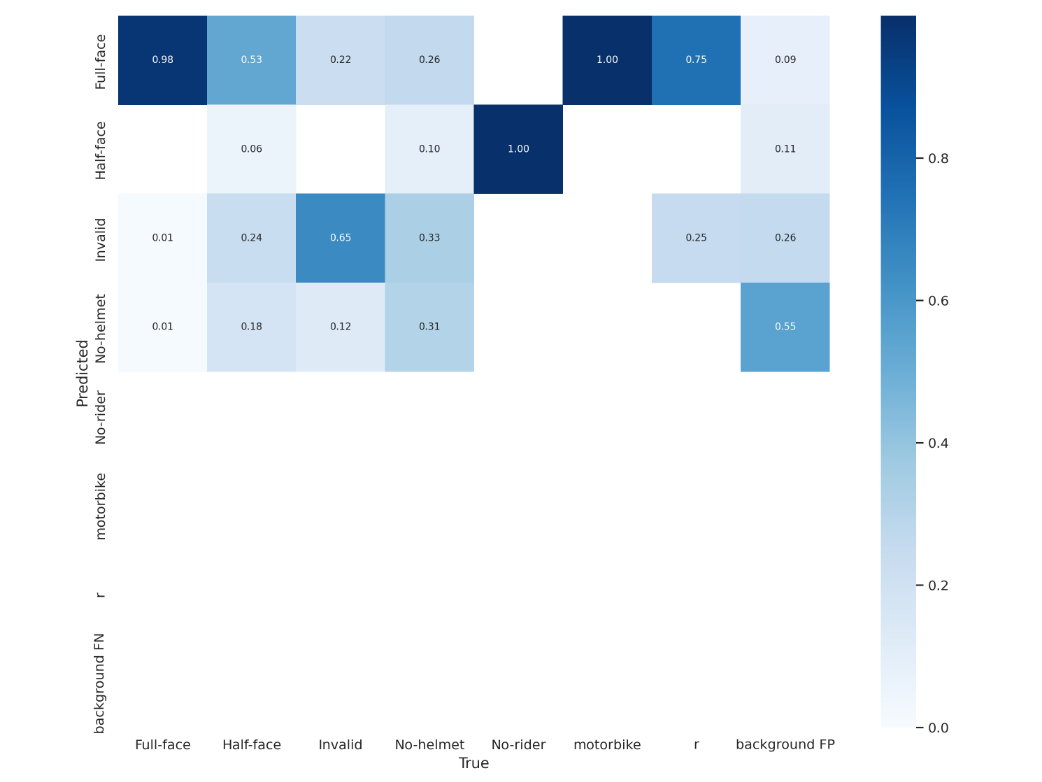

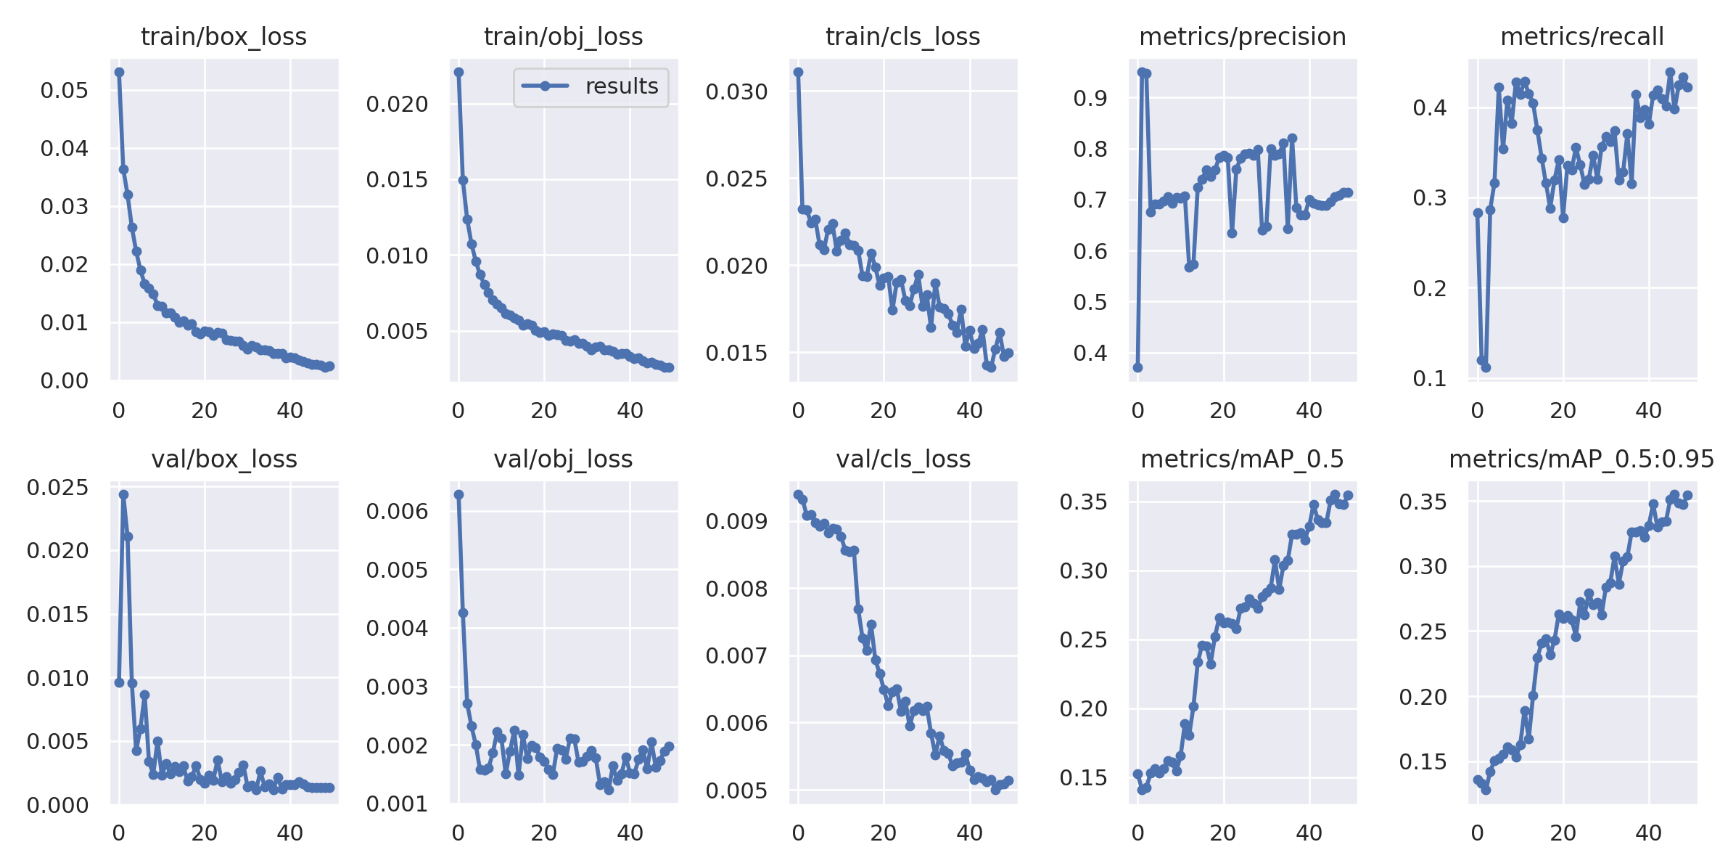

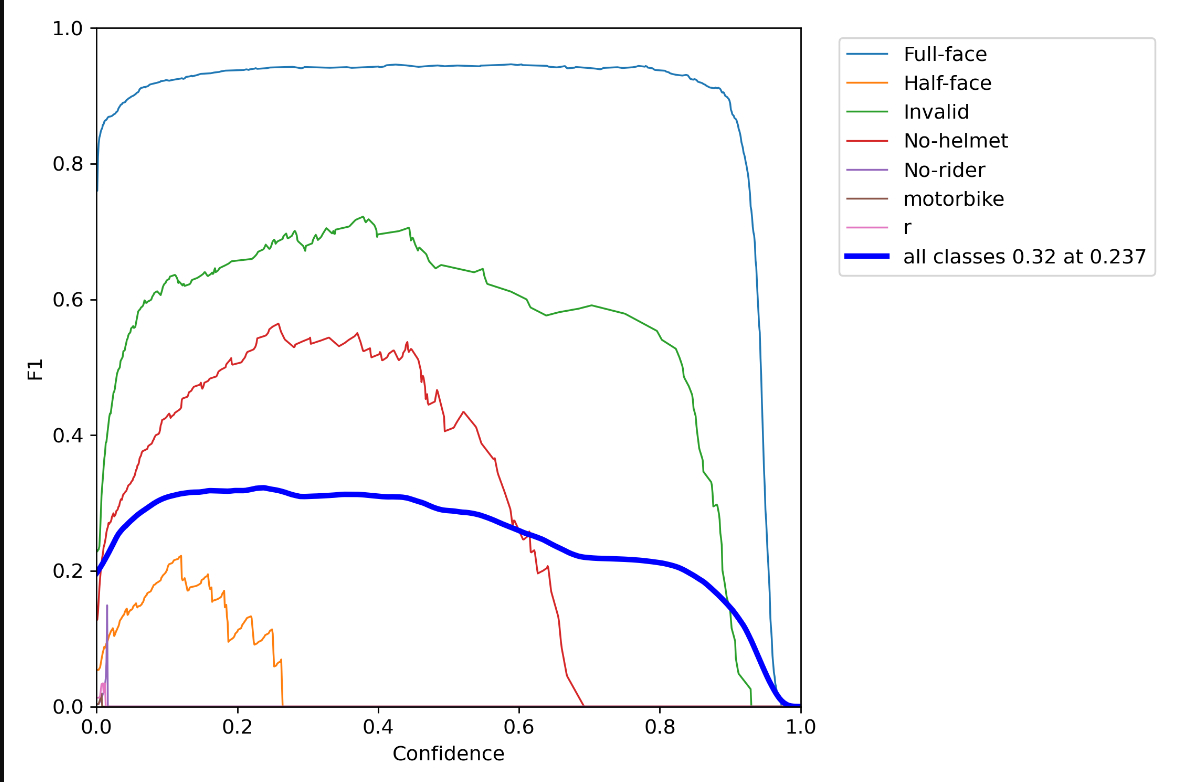

# **YOLOv5 Large Scale for the First Video Cut**

In [ ]:
!python train.py --img 416 --batch 16 --epochs 50 --data /content/MotorcycleDrivers/1st-video-cut/data.yaml --weights yolov5l.pt --cache

## **TensorBoard**

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
#detecting and predicting using the test dataset
!python detect.py --weights runs/train/exp4/weights/best.pt --img 416 --conf 0.1 --source /content/MotorcycleDrivers/1st-video-cut/test/images

In [ ]:
#display inference on ALL test images
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp4/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# **RESULTS OF 1st-Video Cut (Large Scale)**

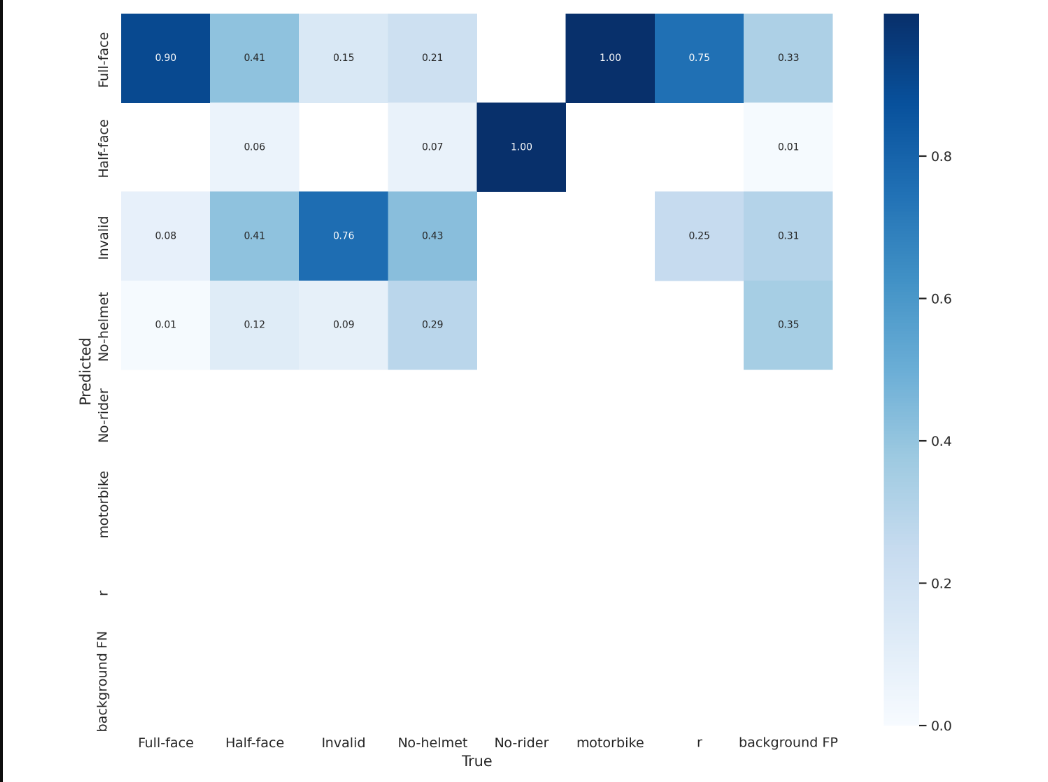

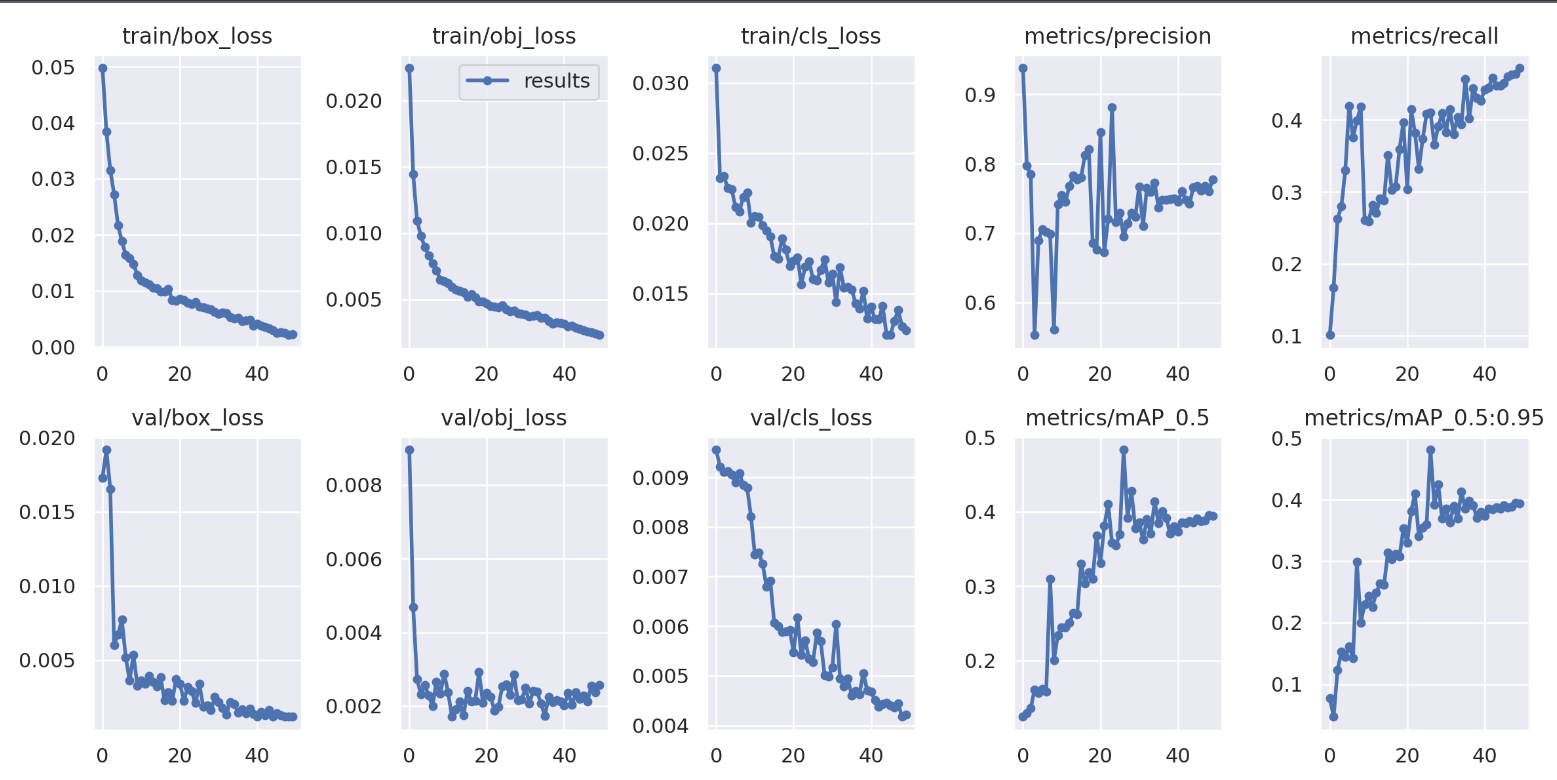

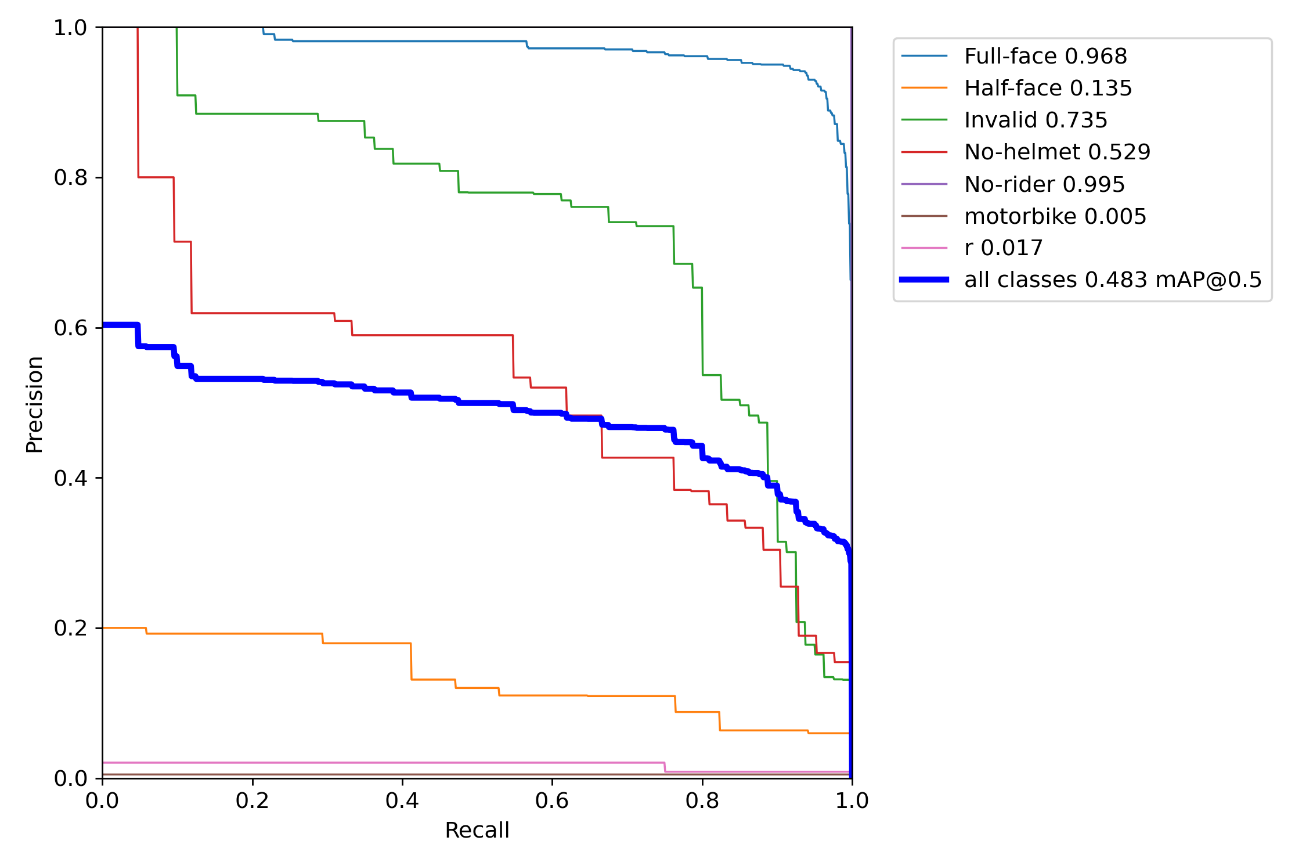

# **Video Test Results**
The result of the video detection could be downloaded from the above cell. The trained model was able to detect motorcycle riders in the video and classify them if they are wearing proper helmet or not, or no helmet at all. The detection capability of the model to video inputs is show in the picture below.

In [ ]:
!pip install opencv-python

In [ ]:
#upload video file
from google.colab import files
video = files.upload()

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp4/weights/best.pt')

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.10 --source '/content/yolov5/*.mp4'

# **2nd-video-cut (Small)**

In [ ]:
!python train.py --img 416 --batch 16 --epochs 50 --data /content/MotorcycleDrivers/2nd-video-cut/data.yaml --weights yolov5s.pt --cache

## **TensorBoard**

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
#detecting and predicting using the test dataset
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.5 --source /content/MotorcycleDrivers/2nd-video-cut/test/images

In [ ]:

#display inference on ALL test images
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp10/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# **RESULTS OF 2nd-video-cut (Small)**

# **2nd-video-cut (Medium)**

In [ ]:
!python train.py --img 416 --batch 16 --epochs 50 --data /content/MotorcycleDrivers/2nd-video-cut/data.yaml --weights yolov5m.pt --cache


## **TensorBoard**

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
#detecting and predicting using the test dataset
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.5 --source /content/MotorcycleDrivers/2nd-video-cut/test/images

In [ ]:
#display inference on ALL test images
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp11/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# **RESULTS of 2nd-video cut (Medium)**

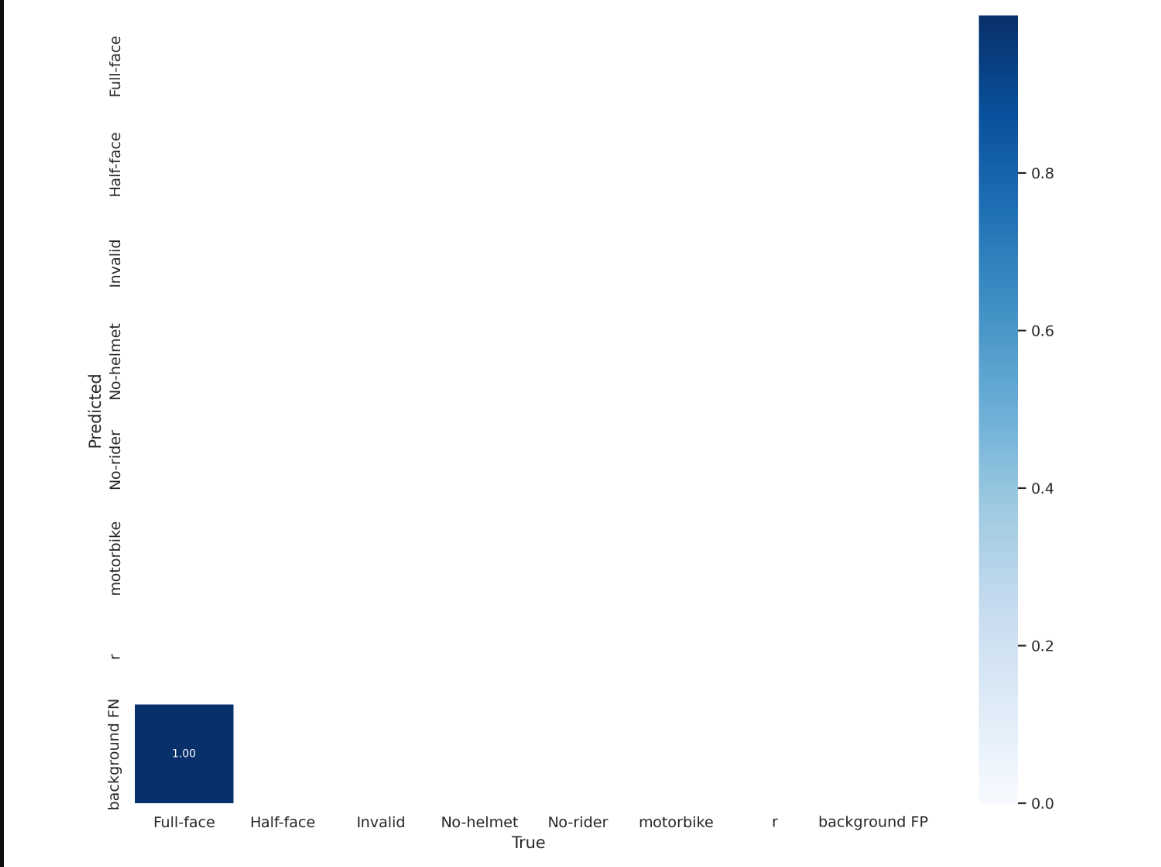

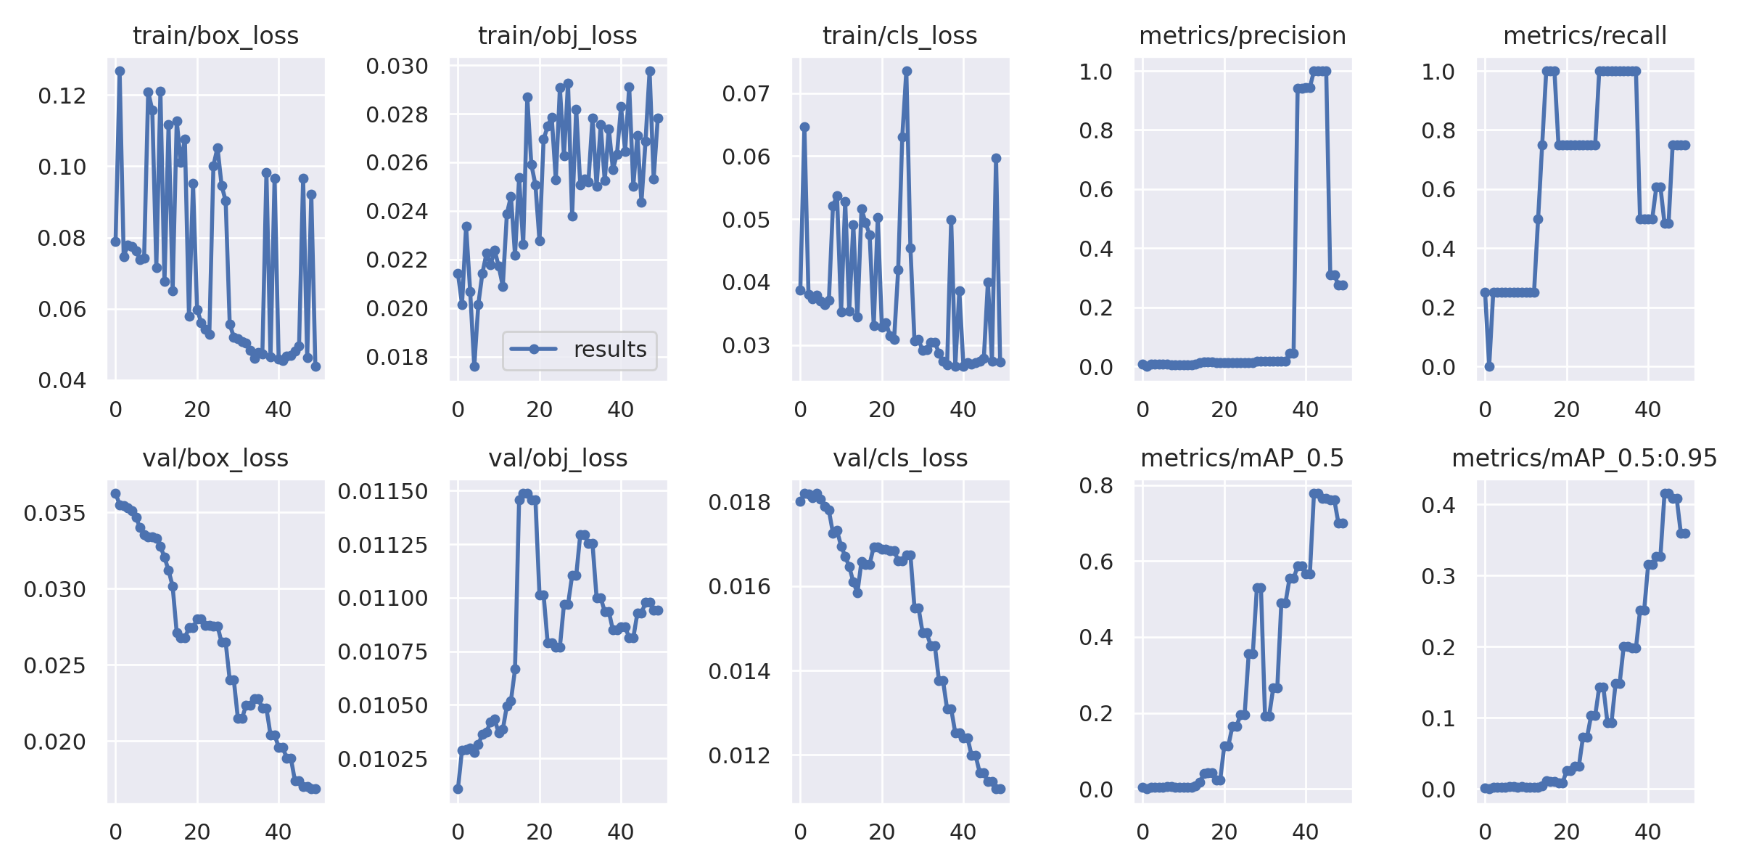

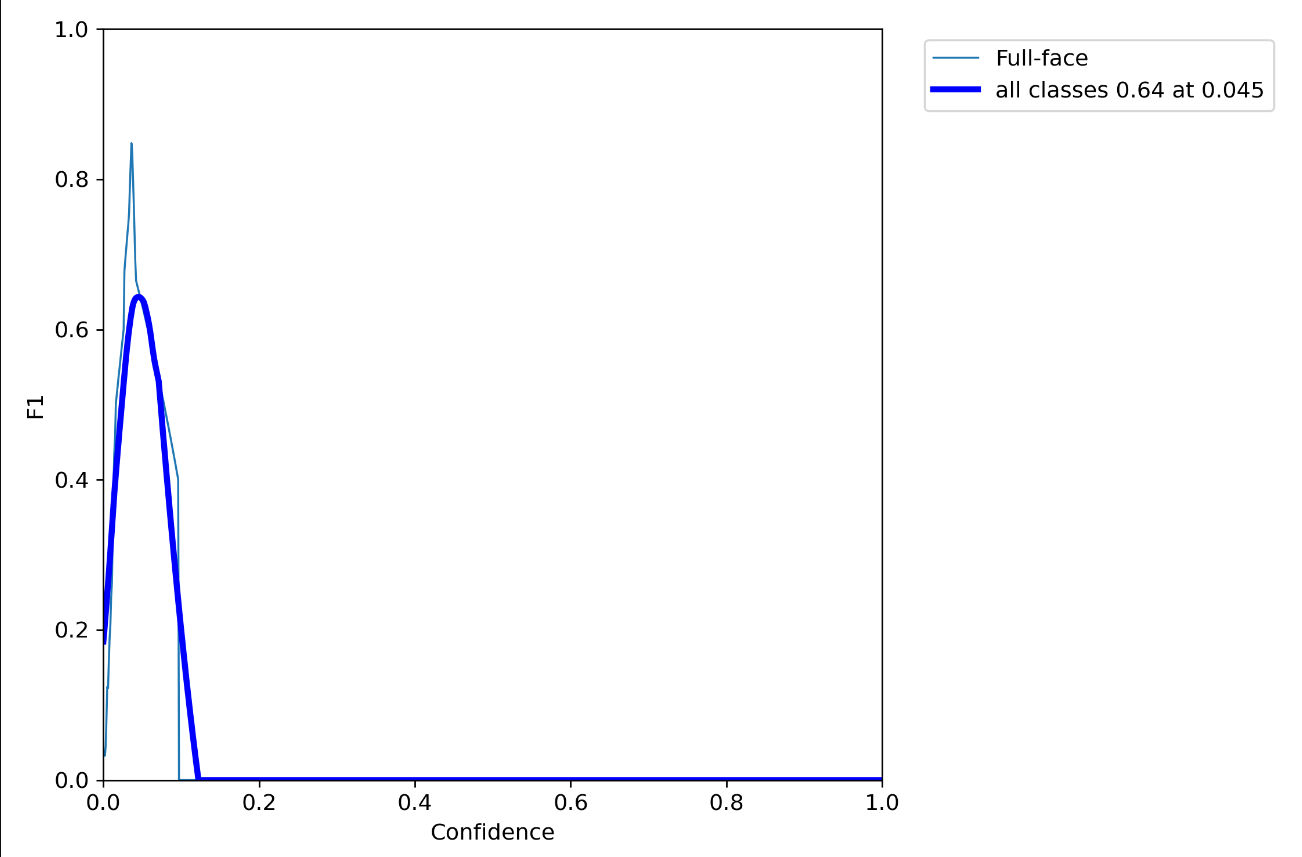

In [ ]:
!python train.py --img 416 --batch 16 --epochs 50 --data /content/MotorcycleDrivers/2nd-video-cut/data.yaml --weights yolov5l.pt --cache


# **Tensorboard**

In [ ]:

# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%reload_ext tensorboard
%tensorboard --logdir runs


In [ ]:
#detecting and predicting using the test dataset
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.5 --source /content/MotorcycleDrivers/2nd-video-cut/train/images

# **RESULTS of 2nd-Video Cut (Large)**

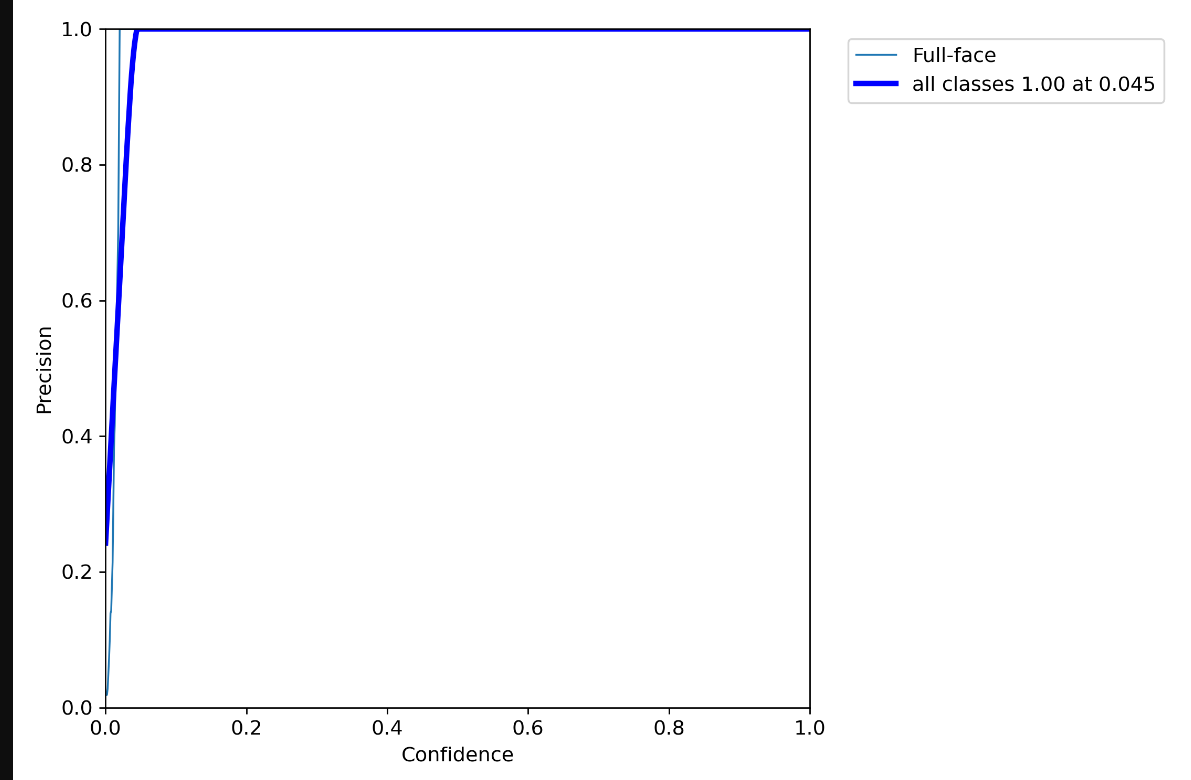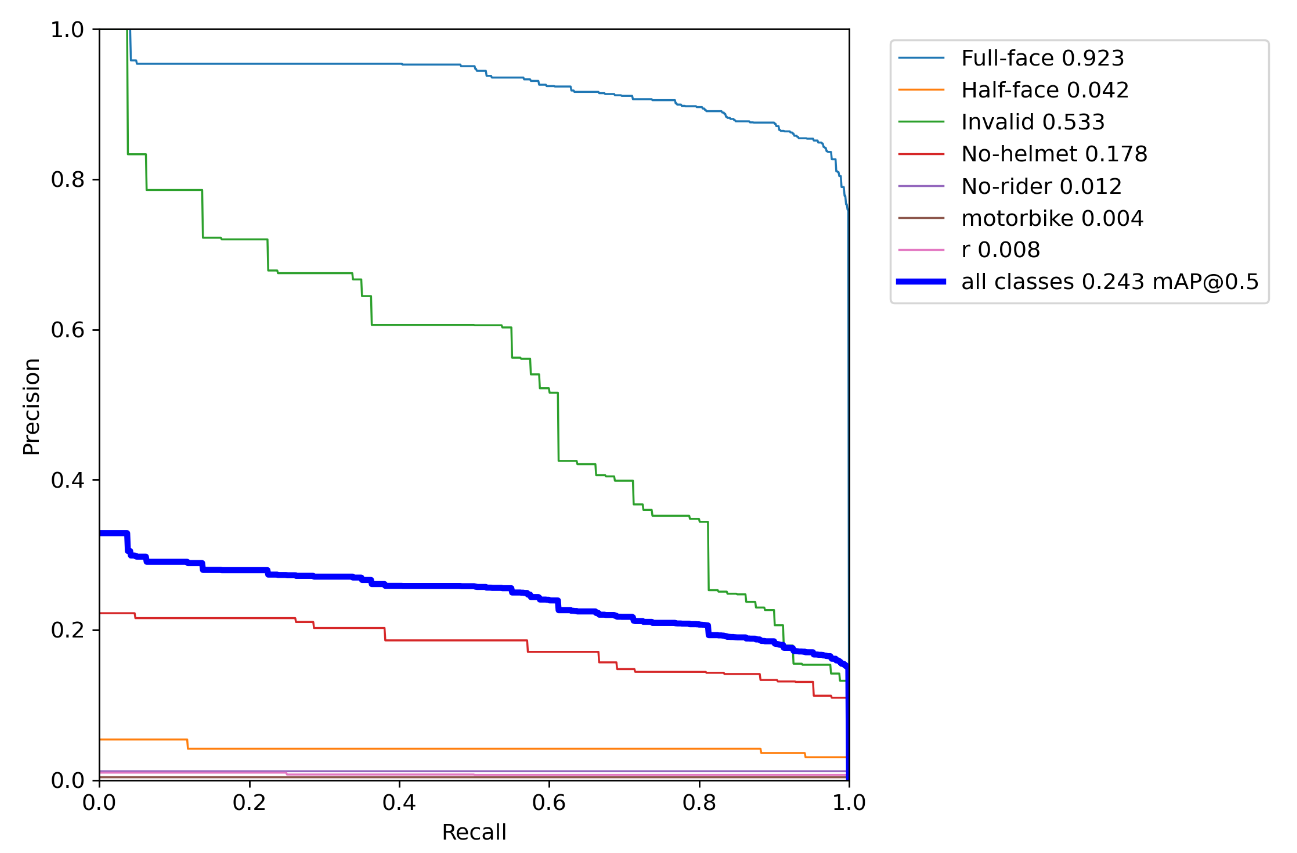

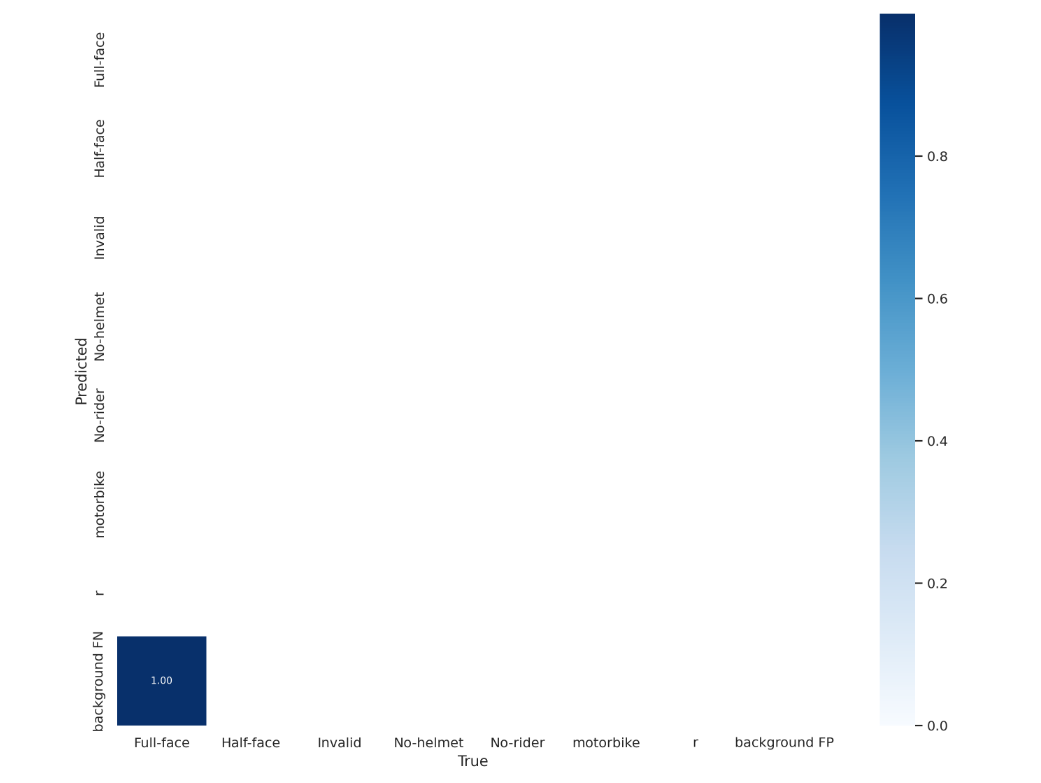

# **Video Test Results**
The result of the video detection could be downloaded from the above cell. The trained model was able to detect motorcycle riders in the video and classify them if they are wearing proper helmet or not, or no helmet at all. The detection capability of the model to video inputs is show in the picture below.

In [ ]:
from google.colab import files
video = files.upload()

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source '/content/yolov5/*.mp4'

# **3rd-video-cut (Small)**

In [ ]:
!python train.py --img 416 --batch 16 --epochs 50 --data /content/MotorcycleDrivers/3rd-video-cut/data.yaml --weights yolov5s.pt --cache

# **First-Video-Cut CCTV with Object Detection**
[Video here]()

# **Second-Video-Cut CCTV with Object Detection**
[Video here](https://)

# **Third-Video-Cut CCTV with Object Detection**
[Video here](https://)